# **<span style="color:Green">Aprendizaje supervisado</span>**

Antes de usar el aprendizaje supervisado necesitamos:

- Data sin missings values
- Data en formato numérico
- Data guardada en un pandas DataFrame o NumPy arrar.

Para luego realizar un análisis de datos exploratorio (Exploratory Data Analysis, EDA)

**Scikit-learn** es una biblioteca de software gratuito de aprendizaje automático para el lenguaje de programación Python. Sigue la siguiente sintaxis:

        from sklearn.module import Model
        model = Model()
        model.fit(X, y)
        predictions = model.predict(X_new)
        print(predictions)

## **Clasificación**

Seguimos una serie de pasos:

1. Construir un modelo
2. El modelo aprende de la data etiquetada (data de entrenamiento)
3. Introducimos en el modelo data sin etiqueta
4. El modelo predice las etiquetas de la data no vista

### **K-Nearest Neighbors**

Predecir la etiqueta de un punto de datos mediante:
- Mirando los k puntos de datos etiquetados más cercanos
- Tomar una votación mayoritaria

Veamos un ejemplo:

1. Tenemos una serie de observaciones
![Alt text](image.png)
2. Si queremos clasificar el punto amarillo y tomamos los dos vecinos más cercanos la clasificaicón que tomará será verde.
![Alt text](image-1.png)
3. Pero si tomamos los 10 vecinos más cercanos, la clasificaicón será azul.
![Alt text](image-2.png)

In [58]:

# * Importamos librerías usuales para el trabajo

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [59]:

# * Instalamos la librería para el trabajo de este móduo

# pip install scikit-learn


In [60]:

# * Importamos la librería y el modelo que queremos usar

from sklearn.neighbors import KNeighborsClassifier


In [61]:

# * Lectura de la base de datos (es recomendable realizar un EDA)

enaho = pd.read_parquet('../data/final/enaho_procesada.parquet')

display(enaho.head())
display(enaho.tail())
display(enaho.info())
display(enaho.columns)
display(enaho.shape)

,año,conglome,vivienda,hogar,codperso,ubigeo,male,edad,casado,educacion,...,tamaño_empresa,formalidad,ingresos_mensuales,iddep,agua_potable,electricidad,telefono,celular,tv,internet
0,2018,5002,34,11,1,10101,0.0,49.0,0.0,2.0,...,4.0,1.0,878.532516,Amazonas,1.0,1.0,0.0,1.0,1.0,1.0
1,2018,5002,34,11,2,10101,0.0,22.0,0.0,2.0,...,2.0,1.0,1033.537623,Amazonas,1.0,1.0,0.0,1.0,1.0,1.0
2,2018,5002,34,11,3,10101,0.0,21.0,0.0,2.0,...,1.0,0.0,516.768812,Amazonas,1.0,1.0,0.0,1.0,1.0,1.0
5,2018,5002,83,11,1,10101,1.0,60.0,1.0,1.0,...,1.0,1.0,1446.969697,Amazonas,1.0,1.0,0.0,1.0,1.0,0.0
6,2018,5002,83,11,2,10101,0.0,58.0,1.0,1.0,...,1.0,0.0,155.005107,Amazonas,1.0,1.0,0.0,1.0,1.0,0.0


,año,conglome,vivienda,hogar,codperso,ubigeo,male,edad,casado,educacion,...,tamaño_empresa,formalidad,ingresos_mensuales,iddep,agua_potable,electricidad,telefono,celular,tv,internet
128263,2019,11350,59,11,2,180101,1.0,29.0,0.0,3.0,...,3.0,1.0,2985.916667,Moquegua,1.0,1.0,0.0,1.0,0.0,0.0
128265,2019,11350,78,11,1,180101,0.0,28.0,0.0,2.0,...,4.0,0.0,497.666667,Moquegua,1.0,1.0,0.0,1.0,0.0,0.0
128268,2019,11350,97,11,1,180101,1.0,35.0,0.0,3.0,...,1.0,0.0,1292.916667,Moquegua,1.0,1.0,0.0,1.0,0.0,0.0
128273,2019,11350,116,11,1,180101,0.0,41.0,0.0,2.0,...,1.0,0.0,644.750000,Moquegua,1.0,1.0,0.0,1.0,0.0,1.0
128274,2019,11350,116,11,2,180101,1.0,22.0,0.0,2.0,...,1.0,0.0,1031.583333,Moquegua,1.0,1.0,0.0,1.0,0.0,1.0


<class 'pandas.core.frame.DataFrame'>
Index: 52737 entries, 0 to 128274
Data columns (total 26 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   año                 52737 non-null  int64  
 1   conglome            52737 non-null  int64  
 2   vivienda            52737 non-null  int64  
 3   hogar               52737 non-null  int64  
 4   codperso            52737 non-null  int64  
 5   ubigeo              52737 non-null  int64  
 6   male                52737 non-null  float64
 7   edad                52737 non-null  float64
 8   casado              52737 non-null  float64
 9   educacion           52737 non-null  float64
 10  enfermedad_cronica  52737 non-null  float64
 11  seguro_essalud      52737 non-null  float64
 12  seguro_privado      52737 non-null  float64
 13  seguro_eps          52737 non-null  float64
 14  seguro_policial     52737 non-null  float64
 15  seguro_sis          52737 non-null  float64
 16  tamaño_e

None

Index(['año', 'conglome', 'vivienda', 'hogar', 'codperso', 'ubigeo', 'male',
       'edad', 'casado', 'educacion', 'enfermedad_cronica', 'seguro_essalud',
       'seguro_privado', 'seguro_eps', 'seguro_policial', 'seguro_sis',
       'tamaño_empresa', 'formalidad', 'ingresos_mensuales', 'iddep',
       'agua_potable', 'electricidad', 'telefono', 'celular', 'tv',
       'internet'],
      dtype='object')

(52737, 26)

In [62]:
enaho = pd.get_dummies(enaho, columns=['iddep'], prefix=['iddep'], dtype=int)
enaho = pd.get_dummies(enaho, columns=['año'], prefix=['año'], dtype=int)

enaho.columns

Index(['conglome', 'vivienda', 'hogar', 'codperso', 'ubigeo', 'male', 'edad',
       'casado', 'educacion', 'enfermedad_cronica', 'seguro_essalud',
       'seguro_privado', 'seguro_eps', 'seguro_policial', 'seguro_sis',
       'tamaño_empresa', 'formalidad', 'ingresos_mensuales', 'agua_potable',
       'electricidad', 'telefono', 'celular', 'tv', 'internet',
       'iddep_Amazonas', 'iddep_Ancash', 'iddep_Apurimac', 'iddep_Arequipa',
       'iddep_Ayacucho', 'iddep_Cajamarca', 'iddep_Callao', 'iddep_Cusco',
       'iddep_Huancavelica', 'iddep_Huanuco', 'iddep_Ica', 'iddep_Junin',
       'iddep_La Libertad', 'iddep_Lambayeque', 'iddep_Lima', 'iddep_Loreto',
       'iddep_Madre de Dios', 'iddep_Moquegua', 'iddep_Pasco', 'iddep_Piura',
       'iddep_Puno', 'iddep_San Martin', 'iddep_Tacna', 'iddep_Tumbes',
       'iddep_Ucayali', 'año_2018', 'año_2019'],
      dtype='object')

Como se observa anteriormente, tenemos 768 filas y 9 columnas. Las primeras 8 columnas representan las características y la última columna representa el objetivo/etiqueta.

In [63]:

# * Definimos los inputs

X = enaho[['male', 'edad',
       'casado', 'educacion', 'enfermedad_cronica', 'seguro_essalud',
       'seguro_privado', 'seguro_eps', 'seguro_policial', 'seguro_sis',
       'tamaño_empresa', 'ingresos_mensuales', 'agua_potable',
       'electricidad', 'telefono', 'celular', 'tv', 'internet',
       'iddep_Amazonas', 'iddep_Ancash', 'iddep_Apurimac', 'iddep_Arequipa',
       'iddep_Ayacucho', 'iddep_Cajamarca', 'iddep_Callao', 'iddep_Cusco',
       'iddep_Huancavelica', 'iddep_Huanuco', 'iddep_Ica', 'iddep_Junin',
       'iddep_La Libertad', 'iddep_Lambayeque', 'iddep_Lima', 'iddep_Loreto',
       'iddep_Madre de Dios', 'iddep_Moquegua', 'iddep_Pasco', 'iddep_Piura',
       'iddep_Puno', 'iddep_San Martin', 'iddep_Tacna', 'iddep_Tumbes',
       'iddep_Ucayali', 'año_2018', 'año_2019']]

y = enaho[['formalidad']]

print(X.shape, y.shape)

(52737, 45) (52737, 1)


In [64]:
enaho.formalidad.value_counts()

formalidad
0.0    31362
1.0    21375
Name: count, dtype: int64

Dividamos los datos aleatoriamente en conjuntos de entrenamiento y de prueba.

Ajustaremos/entrenaremos un clasificador en el conjunto de entrenamiento y haremos predicciones en el conjunto de prueba. Luego compararemos las predicciones con las etiquetas conocidas.

Scikit-learn proporciona la posibilidad de dividir datos en train y test utilizando el método train_test_split.

In [65]:

# * Importamos train_test_split
# 
from sklearn.model_selection import train_test_split

Es una buena práctica realizar nuestra división de tal manera que refleje las etiquetas de los datos. En otras palabras, queremos que las etiquetas se dividan en el conjunto de entrenamiento y prueba tal como están en el conjunto de datos original. Entonces usamos el argumento de estratificar.

También creamos un conjunto de prueba de un tamaño de aproximadamente el 40% del conjunto de datos.

In [66]:

# * Separamos nuestra data de entrenamiento de nuestra data de testeo

X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=0.3, random_state=42) #, stratify=y)

In [68]:

# * Seteamos la configuración de nuestro modelo

knn = KNeighborsClassifier(n_neighbors=15)
knn.fit(X_train, y_train)

c:\Python\Python39\lib\site-packages\sklearn\neighbors\_classification.py:233: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier(n_neighbors=15)

#### **Matriz de confusión**

Una matriz de confusión es una tabla que se utiliza a menudo para describir el rendimiento de un modelo de clasificación (o "clasificador") en un conjunto de datos de prueba cuyos valores verdaderos se conocen. Scikit-learn proporciona la posibilidad de calcular la matriz de confusión utilizando el método confusion_matrix.

Supongamos que estamos clasificando operaciones fraudulentas de un banco. Nuestra matriz de confusión quedaría de la siguiente manera:

| |Predicho: legítimo| Predicho: fraudulento|
|-|------------------|-------------------------|
Actual: legítimo | Verdadero negativo | Falso positivo |
Actual: fraudulento | Falso negativo | Verdadero positivo |

Y las métricas que podemos calcular son las siguientes:

- $accuracy: \frac{VP+VN}{VP+VN+FP+FN}$

El accuracy (exactitud) es una métrica de evaluación comúnmente utilizada en problemas de clasificación y se refiere a la proporción de predicciones correctas que un modelo ha realizado sobre el conjunto total de predicciones.

- $precision: \frac{VP}{VP + FP}$

Mide la proporción de instancias positivas reales que el modelo identifica correctamente. Es útil cuando es importante identificar la mayoría de los casos positivos, incluso a costa de algunos falsos positivos.

- $recall (sensibilidad): \frac{VP}{VP + FN}$

Mide la proporción de instancias positivas predichas por el modelo que son realmente positivas. Es útil cuando es crucial que las predicciones positivas sean altamente confiables y los falsos positivos son costosos o no deseados.

- $F1-score: 2* \frac{precision * recall}{precision + recall}$

El F1-score es una métrica de evaluación del rendimiento de un modelo de clasificación que combina la precisión y la exhaustividad (recall) en un solo número. Se utiliza comúnmente en problemas de clasificación binaria y es especialmente útil cuando tienes un conjunto de datos desbalanceado (es decir, una clase tiene muchas más muestras que la otra). A menudo, se considera que un F1-score cercano a 1.0 es excelente, mientras que un F1-score cercano a 0.0 indica un rendimiento deficiente.

In [16]:

# * Importamos confusion_matrix

from sklearn.metrics import confusion_matrix

In [17]:

# * obtengamos las predicciones usando el clasificador que ajustamos arriba

y_pred = knn.predict(X_test)

In [78]:
confusion_matrix(y_test,y_pred)

array([[8761,  643],
       [ 168, 6250]], dtype=int64)

Considerando la matriz de confusión anterior:

Verdadero negativo = XX

Falso positivo = XX

Verdadero positivo = XX

Fasla negativa = XX

In [19]:
pd.crosstab(y_test, y_pred, rownames=['True'], colnames=['Predicted'], margins=True)

Predicted,0,1,All
True,,,
0,114,37,151
1,34,46,80
All,148,83,231


#### **Reporte de clasificación**

Otro informe importante es el informe de Clasificación. Es un resumen de texto de la precisión, recuperación y puntuación F1 de cada clase. Scikit-learn proporciona la posibilidad de calcular el informe de clasificación utilizando el método Classification_report.

In [79]:

# * import classification_report

from sklearn.metrics import classification_report

In [80]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         0.0       0.98      0.93      0.96      9404
         1.0       0.91      0.97      0.94      6418

    accuracy                           0.95     15822
   macro avg       0.94      0.95      0.95     15822
weighted avg       0.95      0.95      0.95     15822



#### **ROC (Reciever Operating Charecteristic) curve**

Es un gráfico de la tasa de verdaderos positivos frente a la tasa de falsos positivos para los diferentes puntos de corte posibles de una prueba de diagnóstico.

Una curva ROC demuestra varias cosas:

1) Muestra el equilibrio entre sensibilidad y especificidad (cualquier aumento de la sensibilidad irá acompañado de una disminución de la especificidad).

2) Cuanto más cerca siga la curva del borde izquierdo y luego del borde superior del espacio ROC, más precisa será la prueba.

3) Cuanto más se acerque la curva a la diagonal de 45 grados del espacio ROC, menos precisa será la prueba.

4) El área bajo la curva es una medida de la precisión de la prueba.

In [81]:
y_pred_proba = knn.predict_proba(X_test)[:,1]

In [82]:
from sklearn.metrics import roc_curve

In [83]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

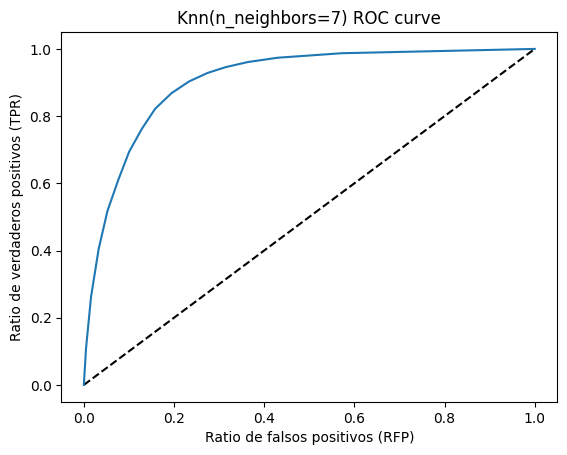

In [84]:

# * CURVA ROC

plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr, label='Knn')
plt.xlabel('Ratio de falsos positivos (RFP)')
plt.ylabel('Ratio de verdaderos positivos (TPR)')
plt.title('Knn(n_neighbors=7) ROC curve')
plt.show()

In [85]:

# * Area under ROC curve (ROC AUC)

from sklearn.metrics import roc_auc_score
roc_auc_score(y_test,y_pred_proba)

0.9058917397753738

In [86]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Suponiendo que 'knn' es tu modelo ya entrenado y tienes los conjuntos de entrenamiento y prueba 'X_train', 'X_test', 'y_train', 'y_test'

# Predicciones en conjunto de entrenamiento
y_train_pred = knn.predict(X_train)

# Predicciones en conjunto de prueba
y_test_pred = knn.predict(X_test)

# Métricas en conjunto de entrenamiento
train_accuracy = accuracy_score(y_train, y_train_pred)
train_precision = precision_score(y_train, y_train_pred)
train_recall = recall_score(y_train, y_train_pred)
train_f1 = f1_score(y_train, y_train_pred)
train_conf_matrix = confusion_matrix(y_train, y_train_pred)

# Métricas en conjunto de prueba
test_accuracy = accuracy_score(y_test, y_test_pred)
test_precision = precision_score(y_test, y_test_pred)
test_recall = recall_score(y_test, y_test_pred)
test_f1 = f1_score(y_test, y_test_pred)
test_conf_matrix = confusion_matrix(y_test, y_test_pred)

# Imprimir métricas
print("Métricas en conjunto de entrenamiento:")
print("Accuracy:", train_accuracy)
print("Precision:", train_precision)
print("Recall:", train_recall)
print("F1 Score:", train_f1)
print("Matriz de Confusión:\n", train_conf_matrix)

print("\nMétricas en conjunto de prueba:")
print("Accuracy:", test_accuracy)
print("Precision:", test_precision)
print("Recall:", test_recall)
print("F1 Score:", test_f1)
print("Matriz de Confusión:\n", test_conf_matrix)


Métricas en conjunto de entrenamiento:
Accuracy: 0.855532981172965
Precision: 0.8069269039418293
Recall: 0.8458246974660694
F1 Score: 0.8259180675697732
Matriz de Confusión:
 [[18931  3027]
 [ 2306 12651]]

Métricas en conjunto de prueba:
Accuracy: 0.8337125521425863
Precision: 0.7799792991276061
Recall: 0.8219071361794952
F1 Score: 0.8003945072452772
Matriz de Confusión:
 [[7916 1488]
 [1143 5275]]


Podemos encapsular todo en una función

In [76]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

def evaluar_modelo(modelo, X_train, y_train, X_test, y_test):
    # Entrenar el modelo
    modelo.fit(X_train, y_train)

    # Predicciones en conjunto de entrenamiento
    y_train_pred = modelo.predict(X_train)

    # Predicciones en conjunto de prueba
    y_test_pred = modelo.predict(X_test)

    # Métricas en conjunto de entrenamiento
    train_accuracy = accuracy_score(y_train, y_train_pred)
    train_precision = precision_score(y_train, y_train_pred)
    train_recall = recall_score(y_train, y_train_pred)
    train_f1 = f1_score(y_train, y_train_pred)
    train_conf_matrix = confusion_matrix(y_train, y_train_pred)

    # Métricas en conjunto de prueba
    test_accuracy = accuracy_score(y_test, y_test_pred)
    test_precision = precision_score(y_test, y_test_pred)
    test_recall = recall_score(y_test, y_test_pred)
    test_f1 = f1_score(y_test, y_test_pred)
    test_conf_matrix = confusion_matrix(y_test, y_test_pred)

    # Imprimir métricas
    print("Métricas en conjunto de entrenamiento:")
    print("Accuracy:", train_accuracy)
    print("Precision:", train_precision)
    print("Recall:", train_recall)
    print("F1 Score:", train_f1)
    print("Matriz de Confusión:\n", train_conf_matrix)

    print("\nMétricas en conjunto de prueba:")
    print("Accuracy:", test_accuracy)
    print("Precision:", test_precision)
    print("Recall:", test_recall)
    print("F1 Score:", test_f1)
    print("Matriz de Confusión:\n", test_conf_matrix)


In [77]:
# Uso de la función
modelo_knn = KNeighborsClassifier(n_neighbors=15)
evaluar_modelo(modelo_knn, X_train, y_train, X_test, y_test)

c:\Python\Python39\lib\site-packages\sklearn\neighbors\_classification.py:233: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Métricas en conjunto de entrenamiento:
Accuracy: 0.855532981172965
Precision: 0.8069269039418293
Recall: 0.8458246974660694
F1 Score: 0.8259180675697732
Matriz de Confusión:
 [[18931  3027]
 [ 2306 12651]]

Métricas en conjunto de prueba:
Accuracy: 0.8337125521425863
Precision: 0.7799792991276061
Recall: 0.8219071361794952
F1 Score: 0.8003945072452772
Matriz de Confusión:
 [[7916 1488]
 [1143 5275]]


### **Regresión logística**

Podemos repetir el ejercicio previo, pero usando una regresión logística. Si es que la probabilidad es mayor a 0.5, la clasificación del individuo será igual a 1, mientras que si es menor a 0.5, la clasificación será 0.

In [70]:
from sklearn.linear_model import LogisticRegression

In [71]:

# * Creamos el modelo

logreg = LogisticRegression()


In [72]:

# * Dividimos la data

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [73]:

# * Entrenamos el modelo

logreg.fit(X_train, y_train)

c:\Python\Python39\lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Python\Python39\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

#### **Ahora te toca a ti**: Evalúa las métricas de performance de este modelo logístico y compáralas con las del modelo entrenado previamente.